In [20]:
from scipy.io import loadmat
from scipy import signal
import librosa.display
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import IPython

MAX_IR_LEN = 20000
SR = 96000

(518, 1589)


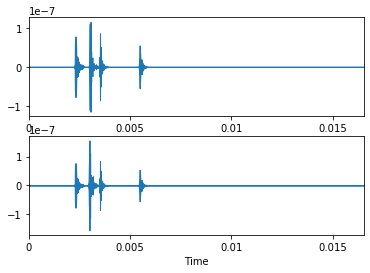

In [27]:
room_path = '/datasets/home/07/907/k1feng/NeuralReverb/dataset/VAST/anechoic.mat'
x = loadmat(room_path)
l_ir     = x['RIR'][0,0][0].T
r_ir     = x['RIR'][0,0][1].T

print(l_ir.shape)
plt.subplot(2, 1, 1)
librosa.display.waveplot(l_ir[0], sr=SR)
plt.subplot(2, 1, 2)
librosa.display.waveplot(r_ir[0], sr=SR)

plt.show()

In [11]:
room_path = '/datasets/home/07/907/k1feng/NeuralReverb/dataset/VAST/train/TrainRoom1'
x = loadmat(room_path)
l_ir     = x['RIR'][0,0][0].T
r_ir     = x['RIR'][0,0][1].T
l_ir     = np.pad(l_ir, (0,MAX_IR_LEN), mode='constant', constant_values=0)
r_ir     = np.pad(r_ir, (0,MAX_IR_LEN), mode='constant', constant_values=0)

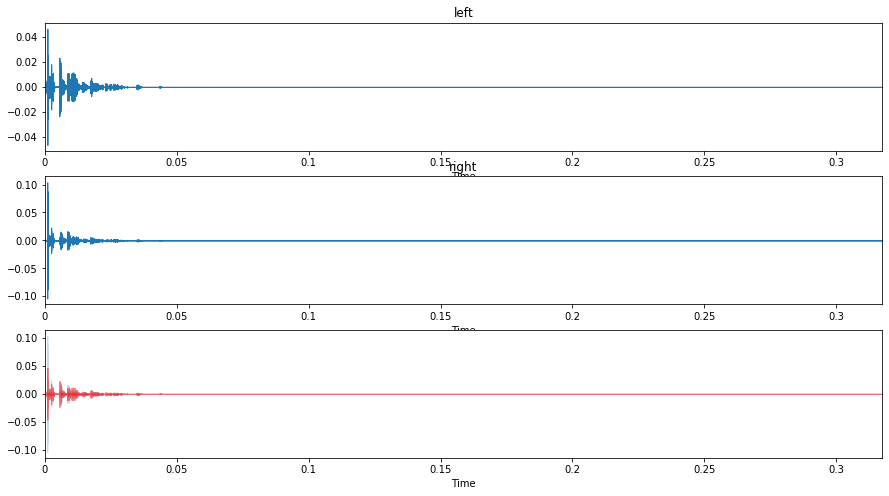

In [10]:
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
librosa.display.waveplot(l_ir[0], sr=SR)
plt.title('left')
plt.subplot(3, 1, 2)
librosa.display.waveplot(r_ir[0], sr=SR)
plt.title('right')
plt.subplot(3, 1, 3)
librosa.display.waveplot(r_ir[0], sr=SR, alpha=0.25)
librosa.display.waveplot(l_ir[0], sr=SR, color='r', alpha=0.5)
plt.show()

In [4]:
IPython.display.Audio(l_ir[0], rate=SR)

(33, 1905)
(33, 1905)
(129, 477)
(129, 477)


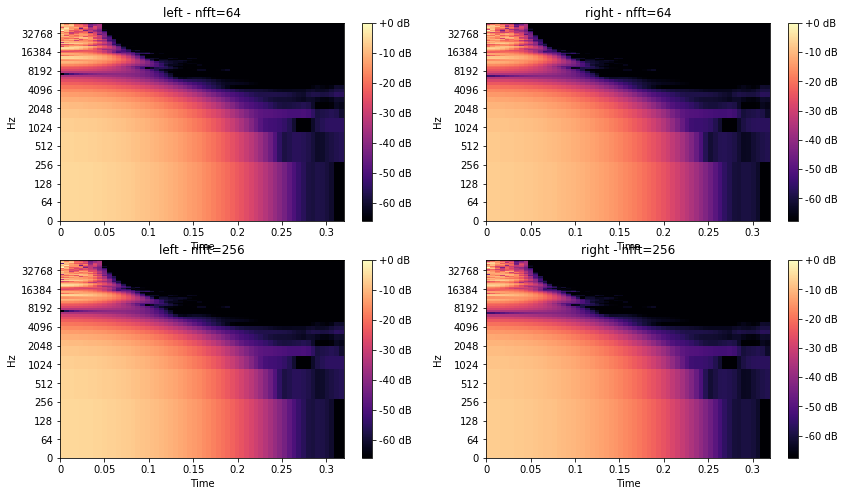

In [5]:
def drawFFT(y, nfft=64):
    fft = librosa.stft(y,hop_length=int(nfft/4), win_length=nfft, n_fft=nfft, center=True)
    print(fft.shape)
    d = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=SR)), ref=np.max)
    librosa.display.specshow(d, sr=SR, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    
plt.figure(figsize=(14, 8))
plt.subplot(2,2,1)
plt.title('left - nfft=64')
drawFFT(l_ir[0],nfft=64)
plt.subplot(2,2,2)
plt.title('right - nfft=64')
drawFFT(r_ir[0],nfft=64)
plt.subplot(2,2,3)
plt.title('left - nfft=256')
drawFFT(l_ir[0],nfft=256)
plt.subplot(2,2,4)
plt.title('right - nfft=256')
drawFFT(r_ir[0],nfft=256)

In [29]:
import yaml
from neuralnet.model import SimpleReverberator
from data.data_loader import get_loader
import torch

config = yaml.load(open('config/base_gru.yaml', 'r'), Loader=yaml.SafeLoader)

loader = get_loader(name=config['train_dataset']['name'], 
                datadir = config['train_dataset']['datadir'],
                anechoic_path = config['train_dataset']['anechoic'],
                batch_size = config['train_dataset']['batch_size'], 
                num_workers = config['train_dataset']['num_workers']) 

model = SimpleReverberator(config)

count = 0
for y, y_orig in loader:
    model.set_input(y, y_orig)
#     model.optimize_parameters()
    params = [-11.8559,  -7.4643, -11.8053,  -7.8465]
    out = model._exp_decay_reverb(y_orig[:,0,:].squeeze(1), torch.Tensor([params[0]]),  torch.Tensor([params[1]]))
    break

In [13]:
tt = out.detach().numpy()[0]

print(tt)

[-1.3193803e-08  1.4433346e-08  2.3399942e-08 ...  1.0899934e-08
  4.5958819e-09 -1.1851138e-08]


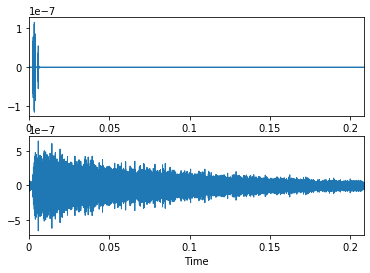

In [32]:
# run one batch
plt.subplot(2, 1, 1)
librosa.display.waveplot(y_orig[:,0,:].squeeze(1).numpy()[0], sr=SR)
plt.subplot(2, 1, 2)
librosa.display.waveplot(tt, sr=SR)

In [33]:
IPython.display.Audio(tt, rate=SR)

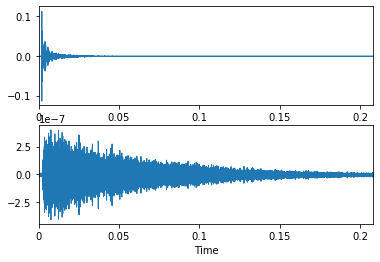

In [11]:
# run ten batch
plt.subplot(2, 1, 1)
librosa.display.waveplot(audio_before.numpy(), sr=SR)
plt.subplot(2, 1, 2)
librosa.display.waveplot(audio_after.detach().numpy(), sr=SR)

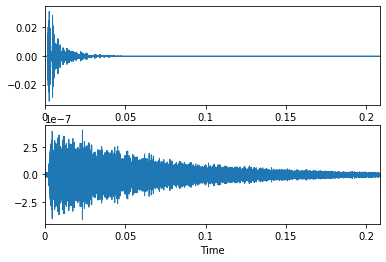

In [15]:
# run 5 batch
plt.subplot(2, 1, 1)
librosa.display.waveplot(audio_before.numpy(), sr=SR)
plt.subplot(2, 1, 2)
librosa.display.waveplot(audio_after.detach().numpy(), sr=SR)